## we need to get this features 

1. Average rainfall
2.  Temperature variance
3.  Soil pH
4.  Nitrogen level
5.  NDVI index
6.  Planting date
7.  Historical yield
8.  Fertilizer amount

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import *


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-agricultural-yield-predictor/Crop_recommendation.csv
/kaggle/input/ai-agricultural-yield-predictor/Crop_Data.xlsx.csv
/kaggle/input/ai-agricultural-yield-predictor/crop-yield.csv
/kaggle/input/ai-agricultural-yield-predictor/agriculture_dataset.csv
/kaggle/input/ai-agricultural-yield-predictor/egypt_local_crop_prices_2023_2025.csv


In [2]:
df1=pd.read_csv('/kaggle/input/ai-agricultural-yield-predictor/Crop_Data.xlsx.csv')
df1.head()

,temperature,humidity,ph,rainfall,label,Label_Num
0,20.879744,82.002744,6.502985,202.935536,rice,0
1,21.770462,80.319644,7.038096,226.655537,rice,0
2,23.004459,82.320763,7.840207,263.964248,rice,0
3,26.491096,80.158363,6.980401,242.864034,rice,0
4,20.130175,81.604873,7.628473,262.717340,rice,0


In [3]:
df1.shape

(2200, 6)

In [5]:
df1.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
Label_Num      0
dtype: int64

In [6]:
df1.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label', 'Label_Num'], dtype='object')

In [7]:
df1['label'].isnull().sum()

np.int64(0)

In [11]:
df1['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   ph           2200 non-null   float64
 3   rainfall     2200 non-null   float64
 4   label        2200 non-null   object 
 5   Label_Num    2200 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 103.3+ KB


In [14]:
import seaborn as sns


In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

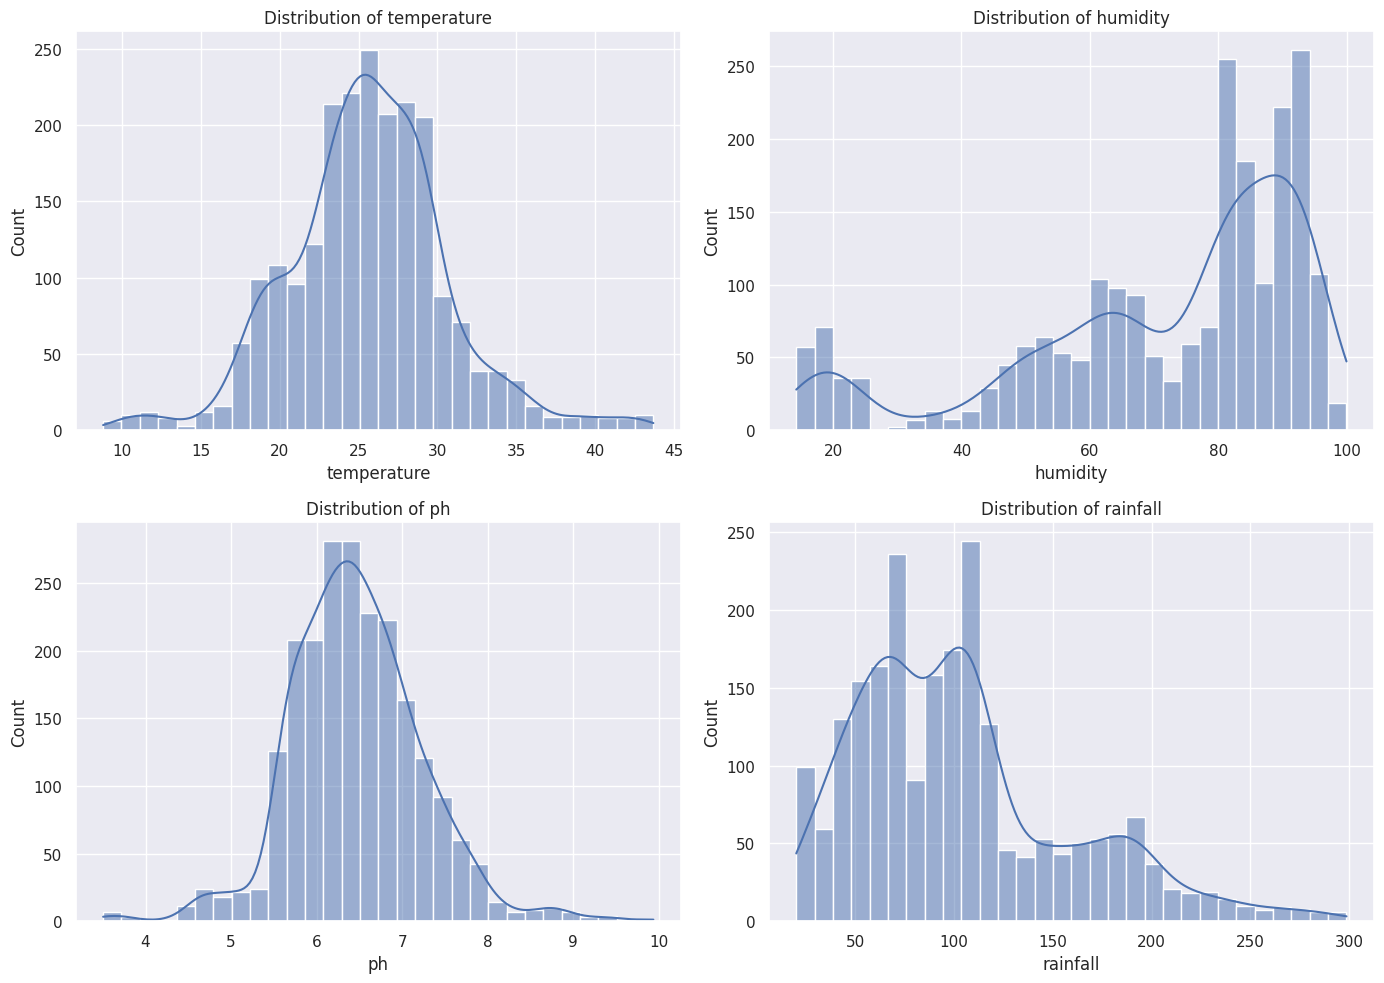

In [17]:
numerical_cols = ['temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(14,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=df1, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
plt.tight_layout()
plt.show()

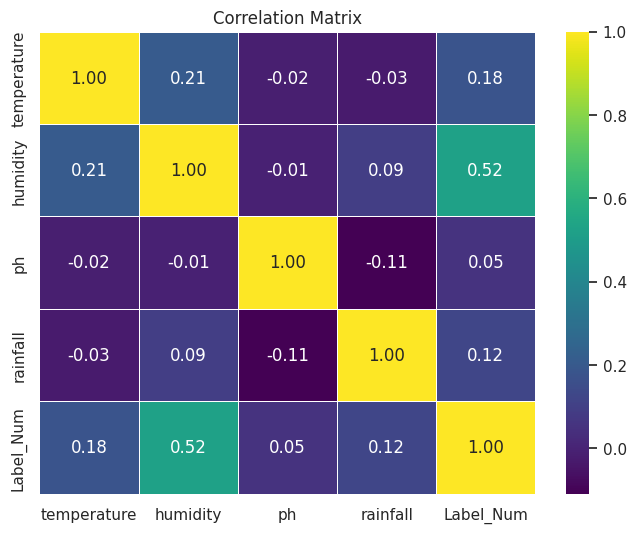

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[numerical_cols + ['Label_Num']].corr(),
            annot=True,
            cmap='viridis',
            fmt=".2f",
            linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


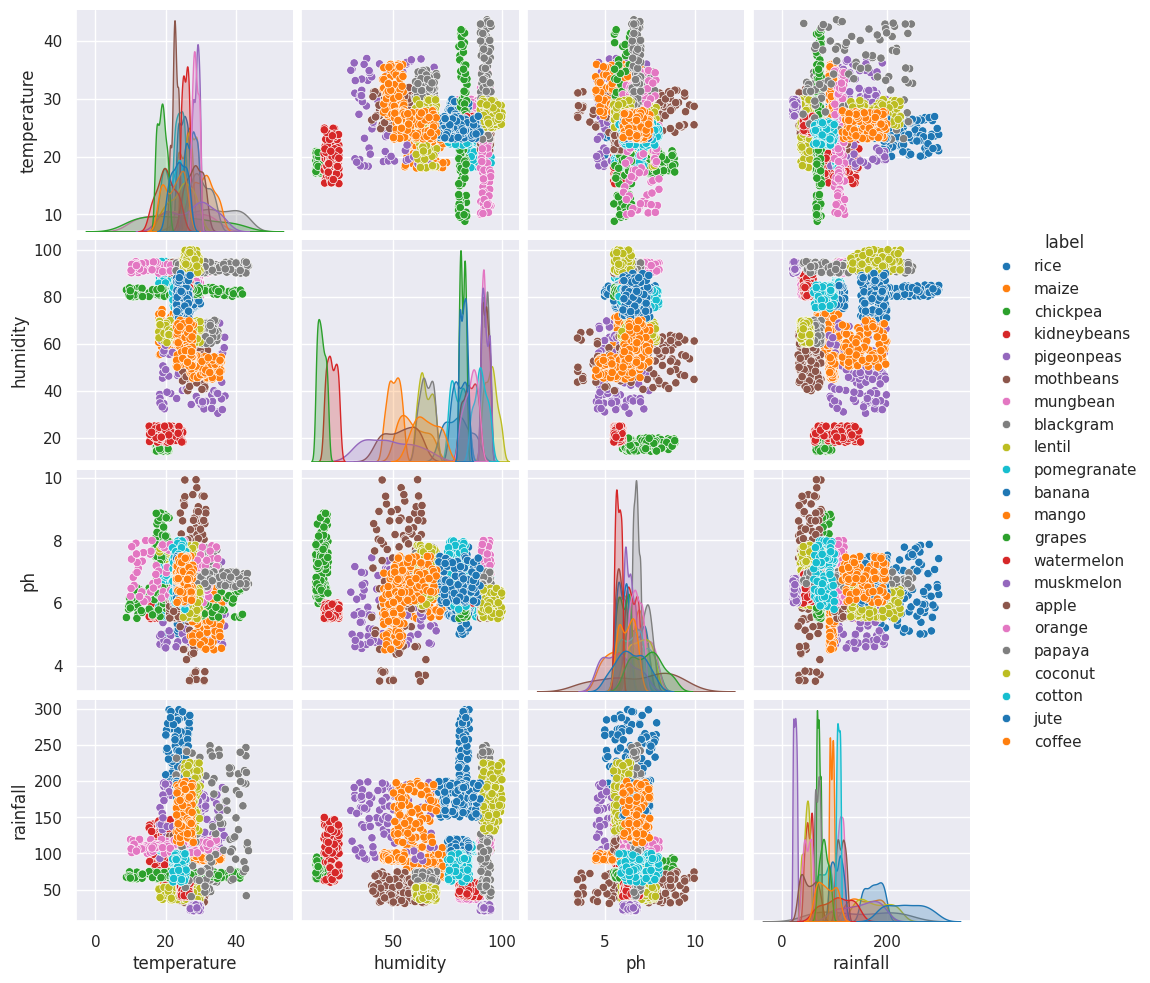

In [19]:
sns.pairplot(df1,
             vars=numerical_cols,
             hue='label',
             palette='tab10',
             diag_kind='kde')
plt.show()

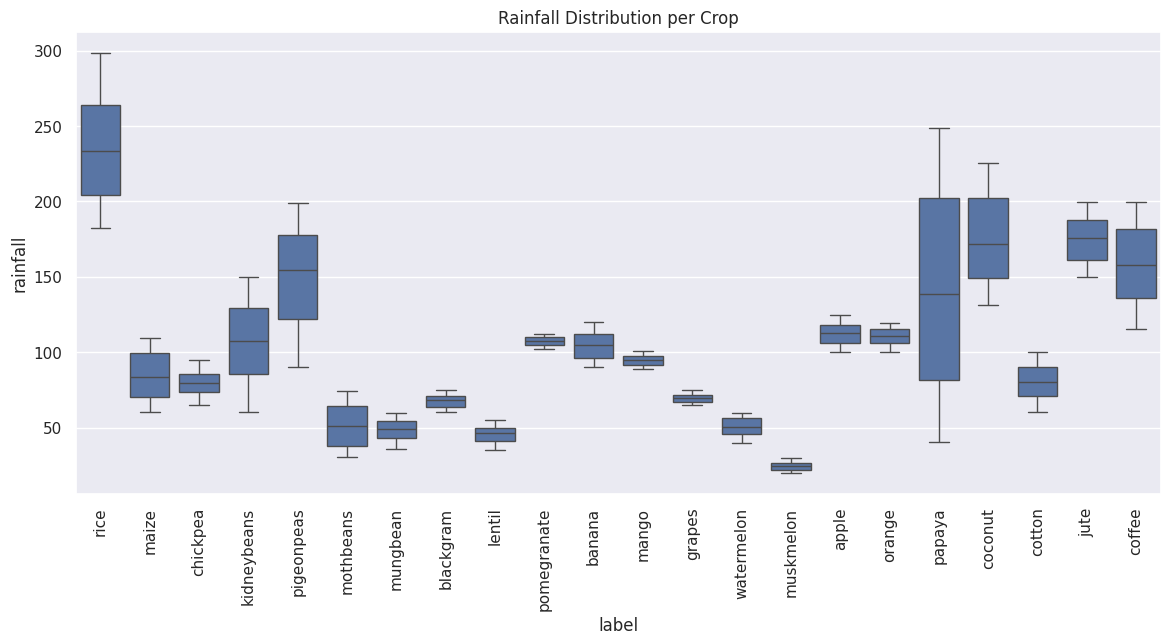

In [20]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df1, x='label', y='rainfall')
plt.xticks(rotation=90)
plt.title("Rainfall Distribution per Crop")
plt.show()

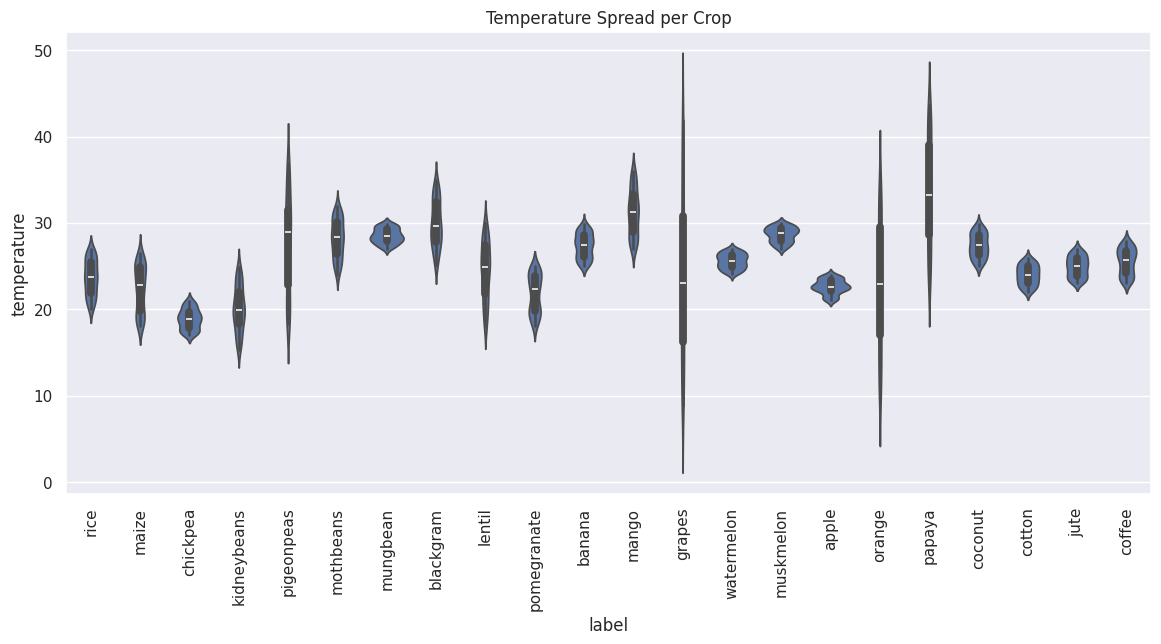

In [22]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df1, x='label', y='temperature')
plt.xticks(rotation=90)
plt.title("Temperature Spread per Crop")
plt.show()


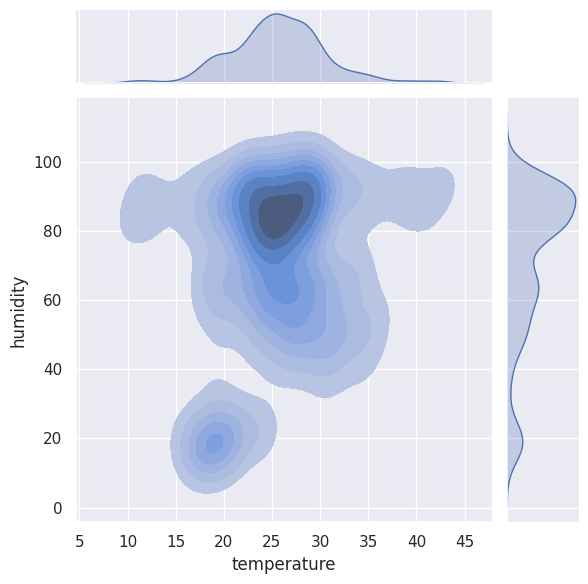

In [23]:
sns.jointplot(data=df1,
              x='temperature',
              y='humidity',
              kind='kde',
              fill=True)
plt.show()


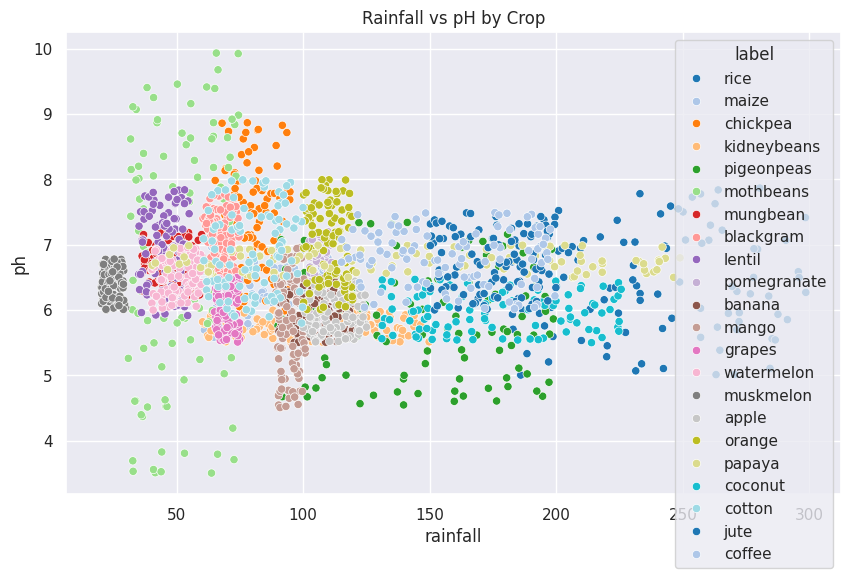

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1,
                x='rainfall',
                y='ph',
                hue='label',
                palette='tab20')
plt.title("Rainfall vs pH by Crop")
plt.show()

In [25]:
df2=pd.read_csv('/kaggle/input/ai-agricultural-yield-predictor/Crop_recommendation.csv')

In [26]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## df1= df2  
# the same features and the same result 

## read data file number 3

In [27]:
df = pd.read_csv('/kaggle/input/ai-agricultural-yield-predictor/agriculture_dataset.csv')

In [28]:
df.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


In [29]:
df.columns

Index(['Farm_ID', 'Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type',
       'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)',
       'Soil_Type', 'Season', 'Water_Usage(cubic meters)'],
      dtype='object')

In [30]:
df.shape

(50, 10)

In [31]:
df.isnull().sum()

Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.9638,139.417782,12.50,135.7100,281.980,368.1075,483.88
Fertilizer_Used(tons),50.0,4.9054,2.732689,0.50,2.4375,5.045,6.8850,9.96
Pesticide_Used(kg),50.0,2.3980,1.438613,0.14,0.9725,2.330,3.4175,4.99
Yield(tons),50.0,27.0592,13.345789,3.86,16.1900,28.970,37.8600,48.02
Water_Usage(cubic meters),50.0,56724.2956,27264.992053,5869.75,37818.1525,54097.075,82240.0325,94754.73


In [34]:
y=pd.read_csv('/kaggle/input/ai-agricultural-yield-predictor/crop-yield.csv')

In [36]:
y.columns

Index(['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Soil_Type',
       'Organic_Carbon', 'Temperature', 'Humidity', 'Rainfall',
       'Sunlight_Hours', 'Wind_Speed', 'Region', 'Altitude', 'Season',
       'Crop_Type', 'Irrigation_Type', 'Fertilizer_Used', 'Pesticide_Used',
       'Crop_Yield_ton_per_hectare'],
      dtype='object')

In [37]:
 df1.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label', 'Label_Num'], dtype='object')

## 📦 Dataset 1
['temperature', 'humidity', 'ph', 'rainfall', 'label', 'Label_Num']

# using it in
Crop Recommendation Model

## 📦 Dataset 2
['N','P','K','Soil_pH','Soil_Moisture','Soil_Type',
 'Organic_Carbon','Temperature','Humidity','Rainfall',
 'Sunlight_Hours','Wind_Speed','Region','Altitude','Season',
 'Crop_Type','Irrigation_Type','Fertilizer_Used',
 'Pesticide_Used','Crop_Yield_ton_per_hectare']

# ✅ Yield Prediction
# ✅ Fertilizer Optimization
# ✅ Irrigation Analysis
# ✅ Climate Impact Analysis

## 📦 Dataset 3
['Farm_ID','Crop_Type','Farm_Area(acres)','Irrigation_Type',
 'Fertilizer_Used(tons)','Pesticide_Used(kg)',
 'Yield(tons)','Soil_Type','Season','Water_Usage(cubic meters)']
 # Farm Management Dataset

## frist model : Crop Recommendation Model 🌱

## 🎯 Goal

Model takes:

temperature

humidity

ph

rain

And it comes out:

✅ The best crop for agriculture (label)

In [42]:
df1.shape

(2200, 6)

In [39]:
X = df1[['temperature', 'humidity', 'ph', 'rainfall']]
y = df1['label']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9568181818181818
              precision    recall  f1-score   support

       apple       0.83      1.00      0.91        20
      banana       1.00      0.95      0.97        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      0.95      0.97        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      1.00      0.98        20
       maize       1.00      1.00      1.00        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.90      0.95        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.83      0.75      0.79        2

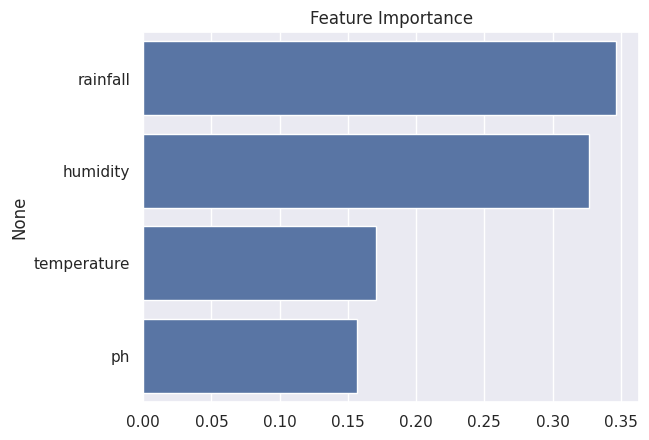

In [43]:
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance")
plt.show()

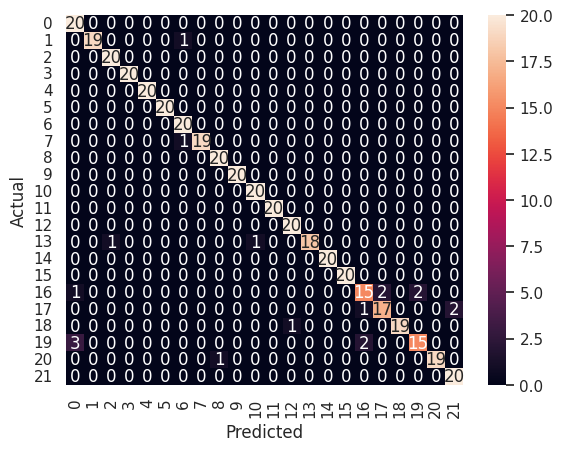

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
import joblib
joblib.dump(model, "crop_recommendation_model.pkl")

['crop_recommendation_model.pkl']

## sec stage : Yield Prediction Model (Main Engine)

In [46]:
df.isnull().sum()

Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64

In [47]:
y.isnull().sum()

np.int64(0)

In [49]:
df4=pd.read_csv('/kaggle/input/ai-agricultural-yield-predictor/crop-yield.csv')

In [50]:
df4.columns

Index(['N', 'P', 'K', 'Soil_pH', 'Soil_Moisture', 'Soil_Type',
       'Organic_Carbon', 'Temperature', 'Humidity', 'Rainfall',
       'Sunlight_Hours', 'Wind_Speed', 'Region', 'Altitude', 'Season',
       'Crop_Type', 'Irrigation_Type', 'Fertilizer_Used', 'Pesticide_Used',
       'Crop_Yield_ton_per_hectare'],
      dtype='object')

In [51]:
df4.isnull().sum()

N                             0
P                             0
K                             0
Soil_pH                       0
Soil_Moisture                 0
Soil_Type                     0
Organic_Carbon                0
Temperature                   0
Humidity                      0
Rainfall                      0
Sunlight_Hours                0
Wind_Speed                    0
Region                        0
Altitude                      0
Season                        0
Crop_Type                     0
Irrigation_Type               0
Fertilizer_Used               0
Pesticide_Used                0
Crop_Yield_ton_per_hectare    0
dtype: int64

<Axes: xlabel='Crop_Yield_ton_per_hectare'>

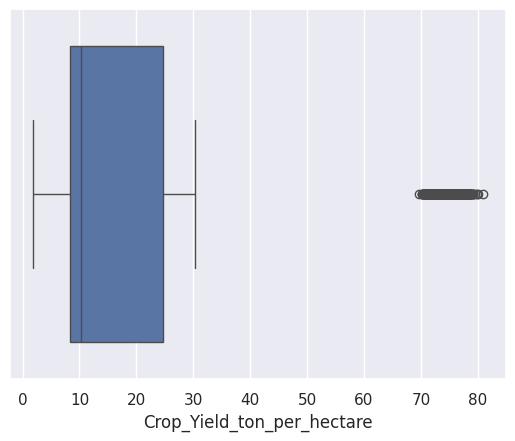

In [52]:
sns.boxplot(x=df4['Crop_Yield_ton_per_hectare'])

## Nutrient Balance

In [53]:
df4['NPK_Total'] = df4['N'] + df4['P'] + df4['K']
df4['N_to_P'] = df4['N'] / (df4['P'] + 1)

## Water Stress Index

In [54]:
df4['Water_Stress'] = df4['Temperature'] / (df4['Rainfall'] + 1)

## Fertilizer Efficiency

In [55]:
df4['Fertilizer_Efficiency'] = df4['Fertilizer_Used'] / (df4['NPK_Total'] + 1)

## Climate Index

In [56]:
df4['Climate_Index'] = (
    df4['Temperature'] * 0.4 +
    df4['Humidity'] * 0.3 +
    df4['Sunlight_Hours'] * 0.3
)

## library we need

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

In [58]:
X = df4.drop("Crop_Yield_ton_per_hectare", axis=1)
y = df4["Crop_Yield_ton_per_hectare"]


In [60]:
X

,N,P,K,Soil_pH,Soil_Moisture,Soil_Type,Organic_Carbon,Temperature,Humidity,Rainfall,...,Season,Crop_Type,Irrigation_Type,Fertilizer_Used,Pesticide_Used,NPK_Total,N_to_P,Water_Stress,Fertilizer_Efficiency,Climate_Index
0,132,62,22,6.35,59.78,Clay,0.43,22.97,53.89,1305.68,...,Rabi,Maize,Canal,223.48,23.36,216,2.095238,0.017579,1.029862,27.674
1,122,71,66,5.98,25.54,Sandy,0.65,17.00,76.90,1942.05,...,Rabi,Potato,Canal,161.54,4.42,259,1.694444,0.008749,0.621308,32.645
2,44,35,104,8.07,25.87,Sandy,0.79,25.52,44.78,2216.20,...,Rabi,Rice,Rainfed,184.62,6.29,183,1.222222,0.011510,1.003370,26.192
3,136,96,113,4.83,42.97,Silt,0.45,18.59,31.89,607.18,...,Kharif,Sugarcane,Rainfed,274.02,2.72,345,1.402062,0.030567,0.791965,19.628
4,101,34,42,5.84,48.01,Silt,0.69,22.74,46.27,483.47,...,Zaid,Wheat,Rainfed,72.69,15.37,177,2.885714,0.046938,0.408371,25.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80,21,64,7.22,34.04,Loamy,0.85,35.20,78.31,850.20,...,Rabi,Wheat,Rainfed,191.11,12.02,165,3.636364,0.041353,1.151265,40.651
9996,168,36,36,6.45,56.84,Loamy,0.66,37.19,38.78,2490.54,...,Zaid,Sugarcane,Canal,238.87,21.86,240,4.540541,0.014927,0.991162,28.871
9997,100,99,24,7.18,18.13,Sandy,0.54,11.36,56.64,1965.34,...,Zaid,Sugarcane,Drip,312.73,18.79,223,1.000000,0.005777,1.396116,24.554
9998,68,20,63,6.32,53.47,Loamy,0.68,35.95,57.94,497.37,...,Kharif,Sugarcane,Rainfed,227.50,10.58,151,3.238095,0.072135,1.496711,34.816


In [61]:
y

0       11.42
1       23.19
2        7.94
3       72.53
4        6.72
        ...  
9995     8.87
9996    77.29
9997    73.57
9998    74.22
9999     7.47
Name: Crop_Yield_ton_per_hectare, Length: 10000, dtype: float64

In [62]:
categorical_cols = ['Soil_Type','Region','Season','Crop_Type','Irrigation_Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [63]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [64]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [65]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Soil_Type', 'Region',
                                                   'Season', 'Crop_Type',
                                                   'Irrigation_Type']),
                                                 ('num', 'passthrough',
                                                  ['N', 'P', 'K', 'Soil_pH',
                                                   'Soil_Moisture',
                                                   'Organic_Carbon',
                                                   'Temperature', 'Humidity',
                                                   'Rainfall', 'Sunlight_Hours',
                                                   'Wind_Speed', 'Altitude',
                                                   'Fertilizer_Used',
                                                   'Pest...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [66]:
y_pred = pipeline.predict(X_test)


In [67]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 1.0618943969700134
R2 Score: 0.9980654262910577


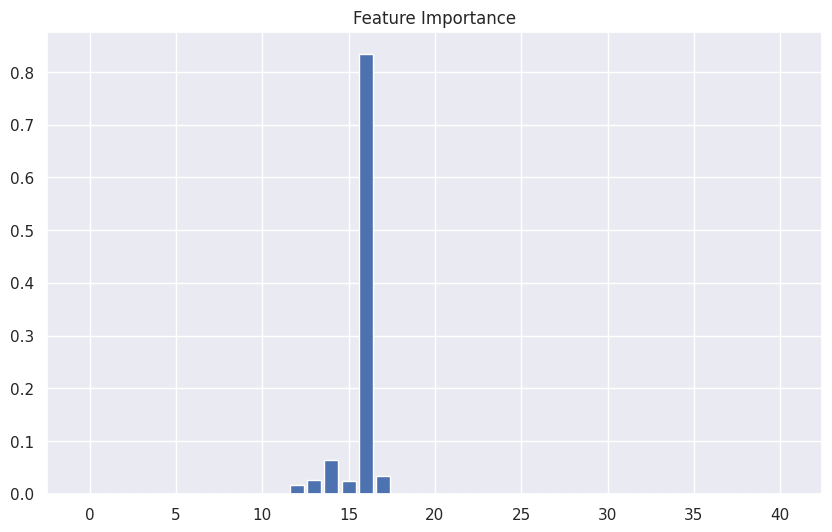

In [68]:
importances = pipeline.named_steps['model'].feature_importances_

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance")
plt.show()

## Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("CV R2 Scores:", scores)
print("Mean CV R2:", scores.mean())

CV R2 Scores: [0.99789685 0.99791493 0.99801662 0.99797498 0.99805928]
Mean CV R2: 0.9979725342819682


In [70]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 0.8500900543832779


## The result, although strong, is worrying, and the strangest thing is that the result is stable and there is no overfitting.

In [71]:
print(df4['Crop_Yield_ton_per_hectare'].describe())

count    10000.000000
mean        22.342801
std         23.986065
min          1.760000
25%          8.280000
50%         10.270000
75%         24.750000
max         80.990000
Name: Crop_Yield_ton_per_hectare, dtype: float64


## Rule of Thumb: Noise = 5–10%

In [72]:
np.random.seed(42)

noise_scale = 1.5 
df_noisy = df4.copy()
df_noisy['Crop_Yield_ton_per_hectare'] += np.random.normal(0, noise_scale, len(df_noisy))

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor


In [74]:
X = df_noisy.drop("Crop_Yield_ton_per_hectare", axis=1)
y = df_noisy["Crop_Yield_ton_per_hectare"]

In [75]:
categorical_cols = ['Soil_Type','Region','Season','Crop_Type','Irrigation_Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [76]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [77]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
rmse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))


In [78]:
print("R² Scores per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores), "Std R²:", np.std(r2_scores))
print("RMSE per fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores), "Std RMSE:", np.std(rmse_scores))

R² Scores per fold: [0.9938875447222341, 0.9936407704545536, 0.9936714979578049, 0.9936561073307004, 0.9933959462305972]
Mean R²: 0.9936503733391779 Std R²: 0.0001559196986179178
RMSE per fold: [np.float64(1.8946334777987746), np.float64(1.9296747623390447), np.float64(1.9146350511603123), np.float64(1.9141340093032944), np.float64(1.9225094177890267)]
Mean RMSE: 1.9151173436780904 Std RMSE: 0.01172475596043717


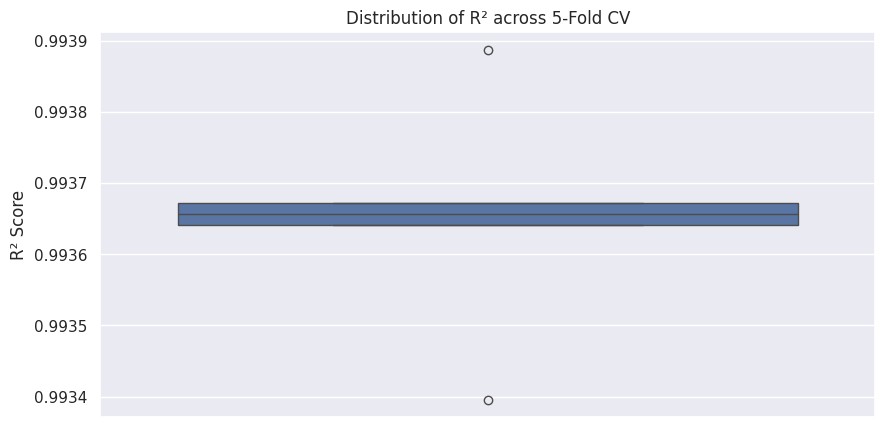

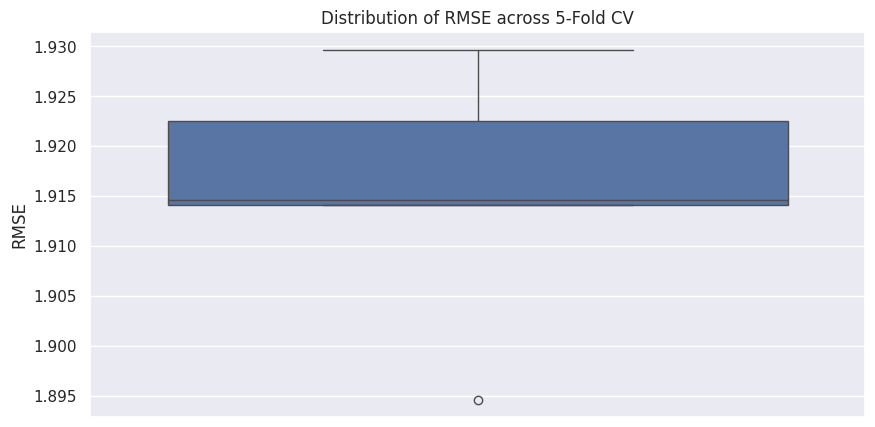

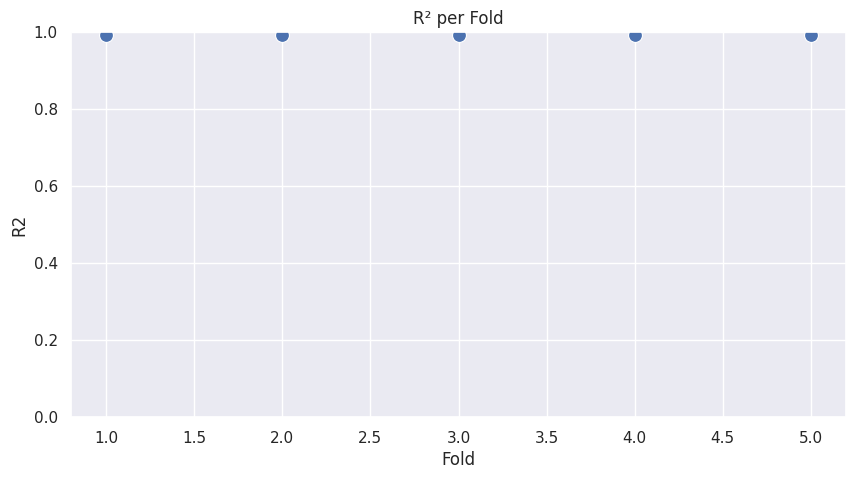

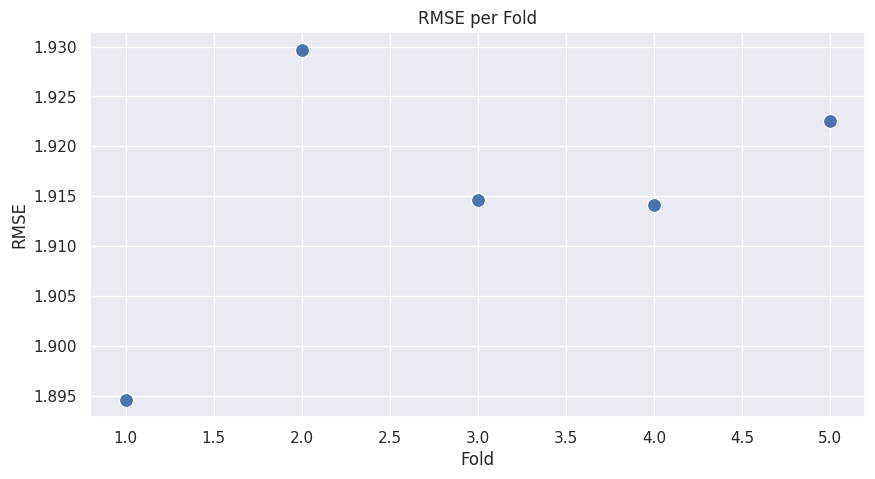

In [79]:
cv_results = pd.DataFrame({
    'Fold': range(1, 6),
    'R2': r2_scores,
    'RMSE': rmse_scores
})

# R² Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=cv_results['R2'])
plt.title("Distribution of R² across 5-Fold CV")
plt.ylabel("R² Score")
plt.show()

# RMSE Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=cv_results['RMSE'])
plt.title("Distribution of RMSE across 5-Fold CV")
plt.ylabel("RMSE")
plt.show()

# Scatter Plot R² vs Fold
plt.figure(figsize=(10,5))
sns.scatterplot(x='Fold', y='R2', data=cv_results, s=100)
plt.title("R² per Fold")
plt.ylim(0, 1)
plt.show()

# Scatter Plot RMSE vs Fold
plt.figure(figsize=(10,5))
sns.scatterplot(x='Fold', y='RMSE', data=cv_results, s=100)
plt.title("RMSE per Fold")
plt.show()

## 🧠 Analysis

# Performance has decreased slightly compared to the first value (R² ≈ 0.998 → Now ≈ 0.9937)
→ This is normal because we added realistic fluctuations
→ The model has become closer to reality

# Stability (Low Std) is excellent
→ The Robust model can withstand small fluctuations in data

#  RMSE ≈ 1.9 tons/ha
→ Average Yield ≈ 22 tons/ha → Percentage error ≈ 8.5%
→ A very logical number in agricultural reality

In [80]:
xgb_model = pipeline.named_steps['model']
preprocessor = pipeline.named_steps['preprocessor']

X_transformed = preprocessor.transform(X)  

In [81]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_transformed)

/tmp/ipykernel_55/55412286.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_transformed, feature_names=preprocessor.get_feature_names_out(), plot_type="bar")


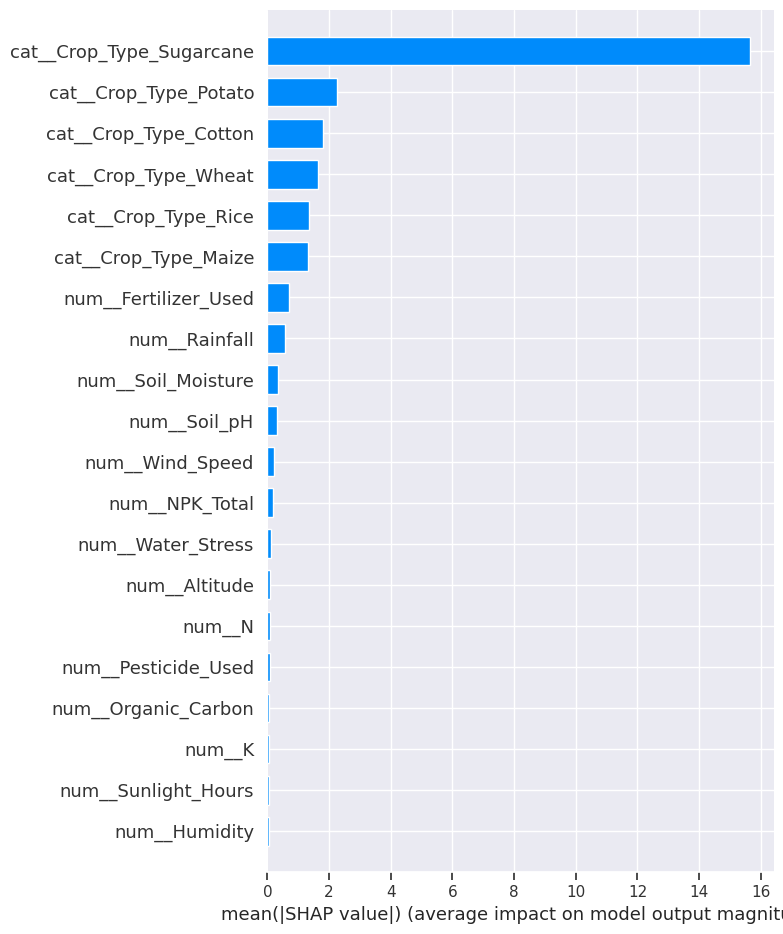

In [82]:
shap.summary_plot(shap_values, X_transformed, feature_names=preprocessor.get_feature_names_out(), plot_type="bar")


/tmp/ipykernel_55/233473800.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_transformed, feature_names=preprocessor.get_feature_names_out())


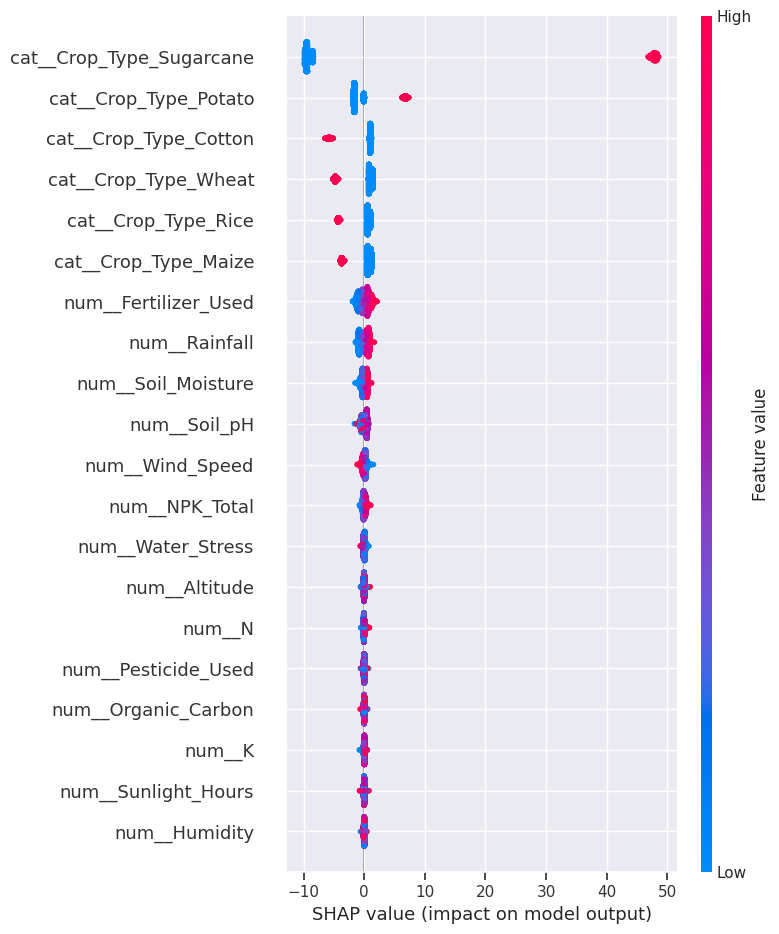

In [83]:
shap.summary_plot(shap_values, X_transformed, feature_names=preprocessor.get_feature_names_out())

## Red color → High Feature value

## Blue color → Low Feature value

In [84]:
#(Preprocessor + XGBoost Model)
joblib.dump(pipeline, "yield_prediction_pipeline.pkl")

print("✅ Yield Prediction Model saved as 'yield_prediction_pipeline.pkl'")

✅ Yield Prediction Model saved as 'yield_prediction_pipeline.pkl'
